# Calculate Border Irregularity

In [1]:
%matplotlib inline
from utilities.images import all_images
from utilities.border import find_border
from pylab import *
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage import color
from skimage import measure

In [2]:
im = all_images["Dermofit"][537].get_image_data()
border, mask, cropped, masked = find_border(im)

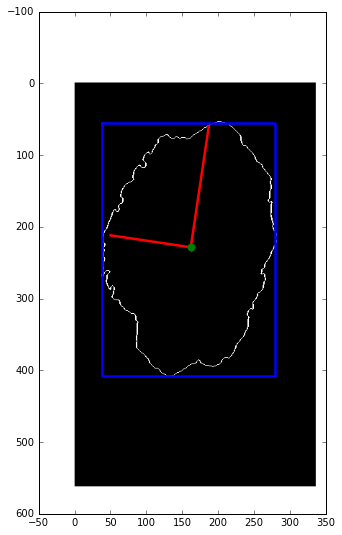

In [3]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
blank = np.zeros((cropped.shape[0],cropped.shape[1]))
boundary = color.rgb2grey(mark_boundaries(blank, border))
ax.imshow(boundary,cmap='Greys_r' )

regions = measure.regionprops(border)
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

## Traverse Border, Pixel by Pixel, and Measure Distances and Angles from Center

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint16.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 1 fits in uint16
  warn(msg)
/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


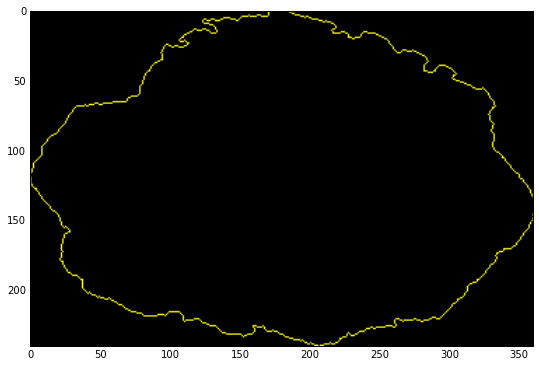

In [4]:
from skimage import measure
from skimage import transform
from scipy.ndimage.measurements import center_of_mass
from skimage import img_as_uint

props = measure.regionprops(border)


# get center of gravity
center = center_of_mass(border)

rotated = transform.rotate(img_as_uint(border), - (props[0].orientation/pi)*180, resize=True, center=center, mode='edge')

props = measure.regionprops(img_as_uint(rotated))
bbox = props[0].bbox
rotated = rotated[bbox[0]:bbox[2], bbox[1]:bbox[3]]

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)

blank = np.zeros((rotated.shape[0],rotated.shape[1]))
boundary = mark_boundaries(blank, img_as_uint(rotated))
ax.imshow(boundary,cmap='Greys_r' )


show()




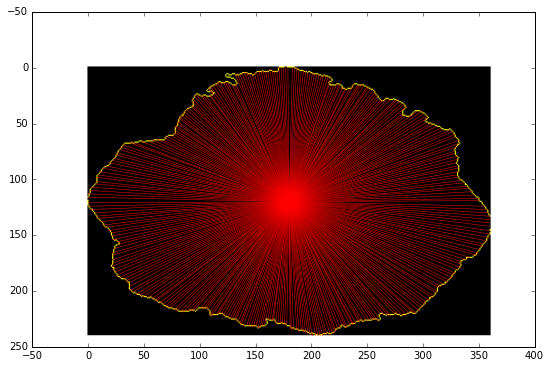

In [7]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.imshow(boundary,cmap='Greys_r' )

from math import atan2, degrees, sqrt
ranges = []
center = (int(rotated.shape[0]/2), int(rotated.shape[1]/2))

for i in range(0, 90):
    value = 100
    dx = 0;
    dy = 0;
    while value > 0.0 and dx < center[1] and dy < center[0]:

        if degrees(atan2(dy, dx)) > i:
            dx += 1
        else:
            dy += 1

        value = rotated[center[0]-dy,center[1]+dx]
        distance = sqrt(dx*dx + dy*dy)

    ranges.append({'distance':distance, 'angle': i, 'point': (center[1]+dx, center[0]-dy)})
    ax.plot((center[1], center[1]+dx), (center[0], center[0] - dy), '-r', linewidth=0.5)

for i in range(90, 180):
    value = 100
    dx = 0;
    dy = 0;
    while value > 0.0 and dx < center[1] and dy < center[0]:

        if degrees(atan2(dy, -dx)) < i:
            dx += 1
        else:
            dy += 1

        value = rotated[center[0]-dy,center[1]-dx]
        distance = sqrt(dx*dx + dy*dy)

    ranges.append({'distance':distance, 'angle': i, 'point': (center[1]-dx, center[0]-dy)})
    ax.plot((center[1], center[1] - dx), (center[0], center[0] - dy), '-r', linewidth=0.5)

for i in range(180, 270):
    value = 100
    dx = 0;
    dy = 0;
    while value > 0.0 and dx < center[1] and dy < center[0]:
        angle = 180 + degrees( atan2(dy, dx))
        if angle > i:
            dx += 1
        else:
            dy += 1

        value = rotated[center[0]+dy,center[1]-dx]
        distance = sqrt(dx*dx + dy*dy)

    ranges.append({'distance':distance, 'angle': i, 'point': (center[1]-dx, center[0]+dy)})
    ax.plot((center[1], center[1] - dx), (center[0], center[0] + dy), '-r', linewidth=0.5)

for i in range(270, 360):
    value = 100
    dx = 0;
    dy = 0;
    while value > 0.0 and dx < center[1] and dy < center[0]:
        value = rotated[center[0] + dy, center[1] + dx]
        distance = sqrt(dx * dx + dy * dy)
        angle = 180 + degrees( atan2(dy, -dx))
        if angle < i:
            dx += 1
        else:
            dy += 1

    ranges.append({'distance':distance, 'angle': i, 'point': (center[1]+dx, center[0]+dy)})
    ax.plot((center[1], center[1] + dx), (center[0], center[0] + dy), '-r', linewidth=0.5)

    
show()